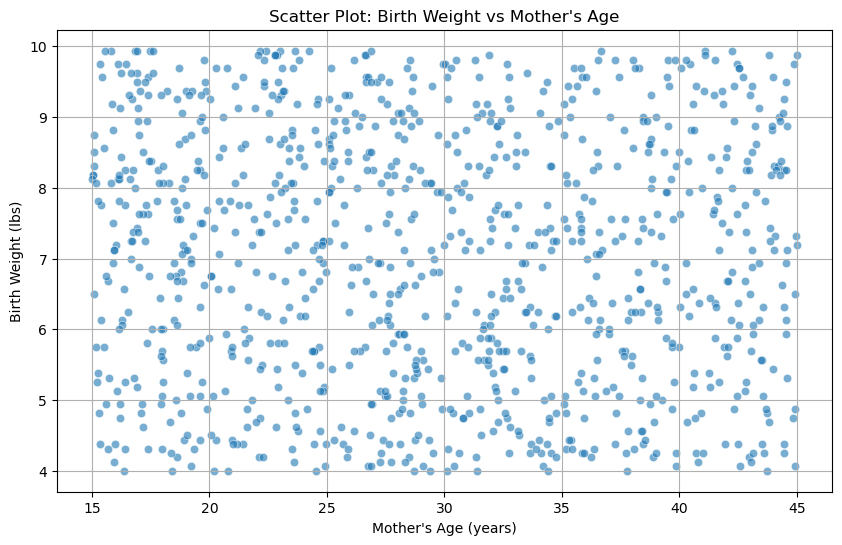

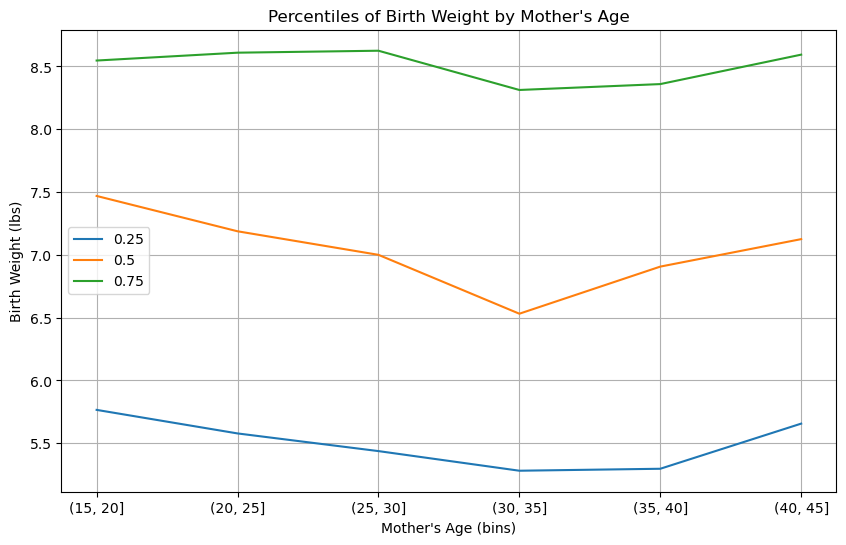

{'Pearson Correlation': -0.052900673095311296,
 'Pearson p-value': 0.0945352348303103,
 'Spearman Correlation': -0.05620393312207724,
 'Spearman p-value': 0.07564957985365318}

In [12]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

# Data cleaning
def CleanFemPreg(df):
    df['agepreg'] /= 100.0
    df.loc[df['birthwgt_lb'] > 20, 'birthwgt_lb'] = np.nan
    
    na_vals = [97, 98, 99]
    df['birthwgt_lb'] = df['birthwgt_lb'].replace(na_vals, np.nan)
    df['birthwgt_oz'] = df['birthwgt_oz'].replace(na_vals, np.nan)
    df['totalwgt_lb'] = df['birthwgt_lb'] + df['birthwgt_oz'] / 16.0
    
    return df


# Generate NSFG pregnancy data
columns = ['agepreg', 'birthwgt_lb', 'birthwgt_oz']
data = {
    'agepreg': np.random.uniform(15, 45, 1000) * 100,
    'birthwgt_lb': np.random.randint(4, 10, 1000),
    'birthwgt_oz': np.random.randint(0, 16, 1000)
}
preg_df = pd.DataFrame(data, columns=columns)
preg_df = CleanFemPreg(preg_df)

# Scatter plot of birth weight vs mother's age
plt.figure(figsize=(10, 6))
sns.scatterplot(x=preg_df['agepreg'], y=preg_df['totalwgt_lb'], alpha=0.6)
plt.title("Scatter Plot: Birth Weight vs Mother's Age")
plt.xlabel("Mother's Age (years)")
plt.ylabel("Birth Weight (lbs)")
plt.grid(True)
plt.show()

# Percentiles
age_bins = pd.cut(preg_df['agepreg'], bins=np.arange(15, 46, 5))
percentiles = preg_df.groupby(age_bins, observed=False)['totalwgt_lb'].quantile([0.25, 0.5, 0.75]).unstack()

percentiles.plot(kind='line', figsize=(10, 6))
plt.title("Percentiles of Birth Weight by Mother's Age")
plt.xlabel("Mother's Age (bins)")
plt.ylabel("Birth Weight (lbs)")
plt.grid(True)
plt.show()

# Pearson's and Spearman's Correlation
pearson_corr, pearson_p = pearsonr(preg_df['agepreg'], preg_df['totalwgt_lb'])
spearman_corr, spearman_p = spearmanr(preg_df['agepreg'], preg_df['totalwgt_lb'])

correlation_results = {
    "Pearson Correlation": pearson_corr,
    "Pearson p-value": pearson_p,
    "Spearman Correlation": spearman_corr,
    "Spearman p-value": spearman_p,
}
correlation_results


In [6]:
# Functions for RMSE and Mean Error
def MeanError(estimates, actual):
    errors = [estimate - actual for estimate in estimates]
    return np.mean(errors)

def RMSE(estimates, actual):
    e2 = [(estimate - actual) ** 2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

def Estimate1(n=7, m=1000):
    mu = 0  # population mean
    sigma = 1  # population standard deviation
    means = []
    medians = []
    for _ in range(m):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)
    return RMSE(means, mu), RMSE(medians, mu)

def Estimate2(n=7, m=1000):
    mu = 0
    sigma = 1
    biased = []
    unbiased = []
    for _ in range(m):
        xs = np.random.normal(mu, sigma, n)
        biased.append(np.var(xs))
        unbiased.append(np.var(xs, ddof=1))
    return MeanError(biased, sigma**2), MeanError(unbiased, sigma**2)

rmse_mean, rmse_median = Estimate1()
mean_error_biased, mean_error_unbiased = Estimate2()

exercise_8_1_results = {
    "RMSE (Mean)": rmse_mean,
    "RMSE (Median)": rmse_median,
    "Mean Error (Biased Variance)": mean_error_biased,
    "Mean Error (Unbiased Variance)": mean_error_unbiased,
}
exercise_8_1_results


{'RMSE (Mean)': 0.38021148037831914,
 'RMSE (Median)': 0.4611486176816549,
 'Mean Error (Biased Variance)': -0.14593842017192654,
 'Mean Error (Unbiased Variance)': -0.0035948235339142974}

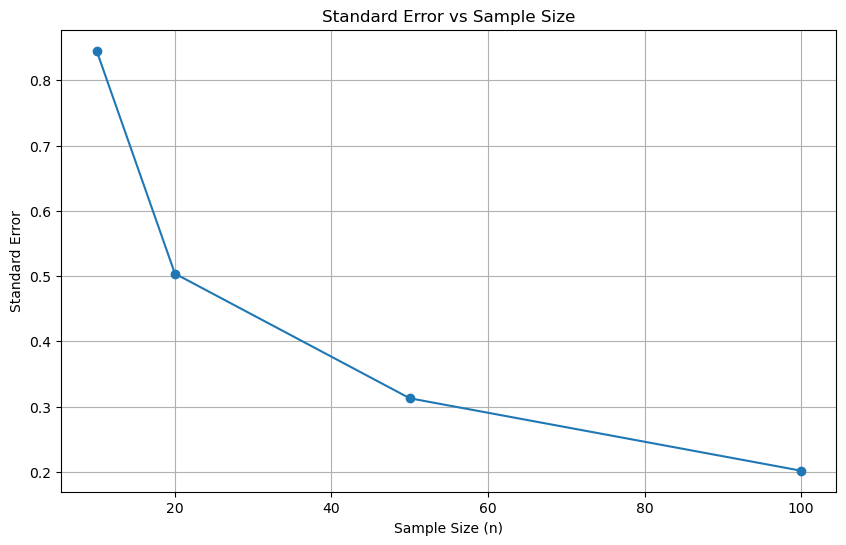

,Standard Error,Confidence Interval
10,0.845258,"[1.285690046864713, 3.757836999851038]"
20,0.503801,"[1.4122331548827078, 2.987329012451867]"
50,0.312795,"[1.6163339288914258, 2.600076963944463]"
100,0.201802,"[1.703084683643874, 2.3742618444942925]"


In [8]:
def SimulateExponential(n=10, lam=2, m=1000):
    means = []
    for _ in range(m):
        sample = np.random.exponential(1/lam, n)
        sample_mean = 1 / np.mean(sample)
        means.append(sample_mean)
    stderr = RMSE(means, lam)
    ci = np.percentile(means, [5, 95])
    return stderr, ci

sample_sizes = [10, 20, 50, 100]
results = {}
for n in sample_sizes:
    stderr, ci = SimulateExponential(n=n)
    results[n] = {"Standard Error": stderr, "Confidence Interval": ci}
exercise_8_2_results = pd.DataFrame(results).T

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, exercise_8_2_results["Standard Error"], marker='o')
plt.title("Standard Error vs Sample Size")
plt.xlabel("Sample Size (n)")
plt.ylabel("Standard Error")
plt.grid(True)
plt.show()

exercise_8_2_results
